##Load Data

In [1]:
import zipfile

# Path to your uploaded zip file
zip_path = "/content/Sleep_Disorder.zip"

# Destination folder for extraction
extract_to = "/content/dataset"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

##Reading Data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(color_codes=True,
              style="darkgrid")

In [7]:
df = pd.read_csv('/content/dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df.shape

(374, 13)

In [9]:
df.info() #null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
#nan remove
df['Sleep Disorder'].where(pd.notnull(df['Sleep Disorder']),'No Disorder')

,Sleep Disorder
0,No Disorder
1,No Disorder
2,No Disorder
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [13]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [14]:
df.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


##EDA

In [15]:
col_name=df.columns
col_name

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [16]:
df.nunique()

,0
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,4
Blood Pressure,25


In [17]:
#dropping person ID

df.drop(columns='Person ID',inplace=True)

In [18]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

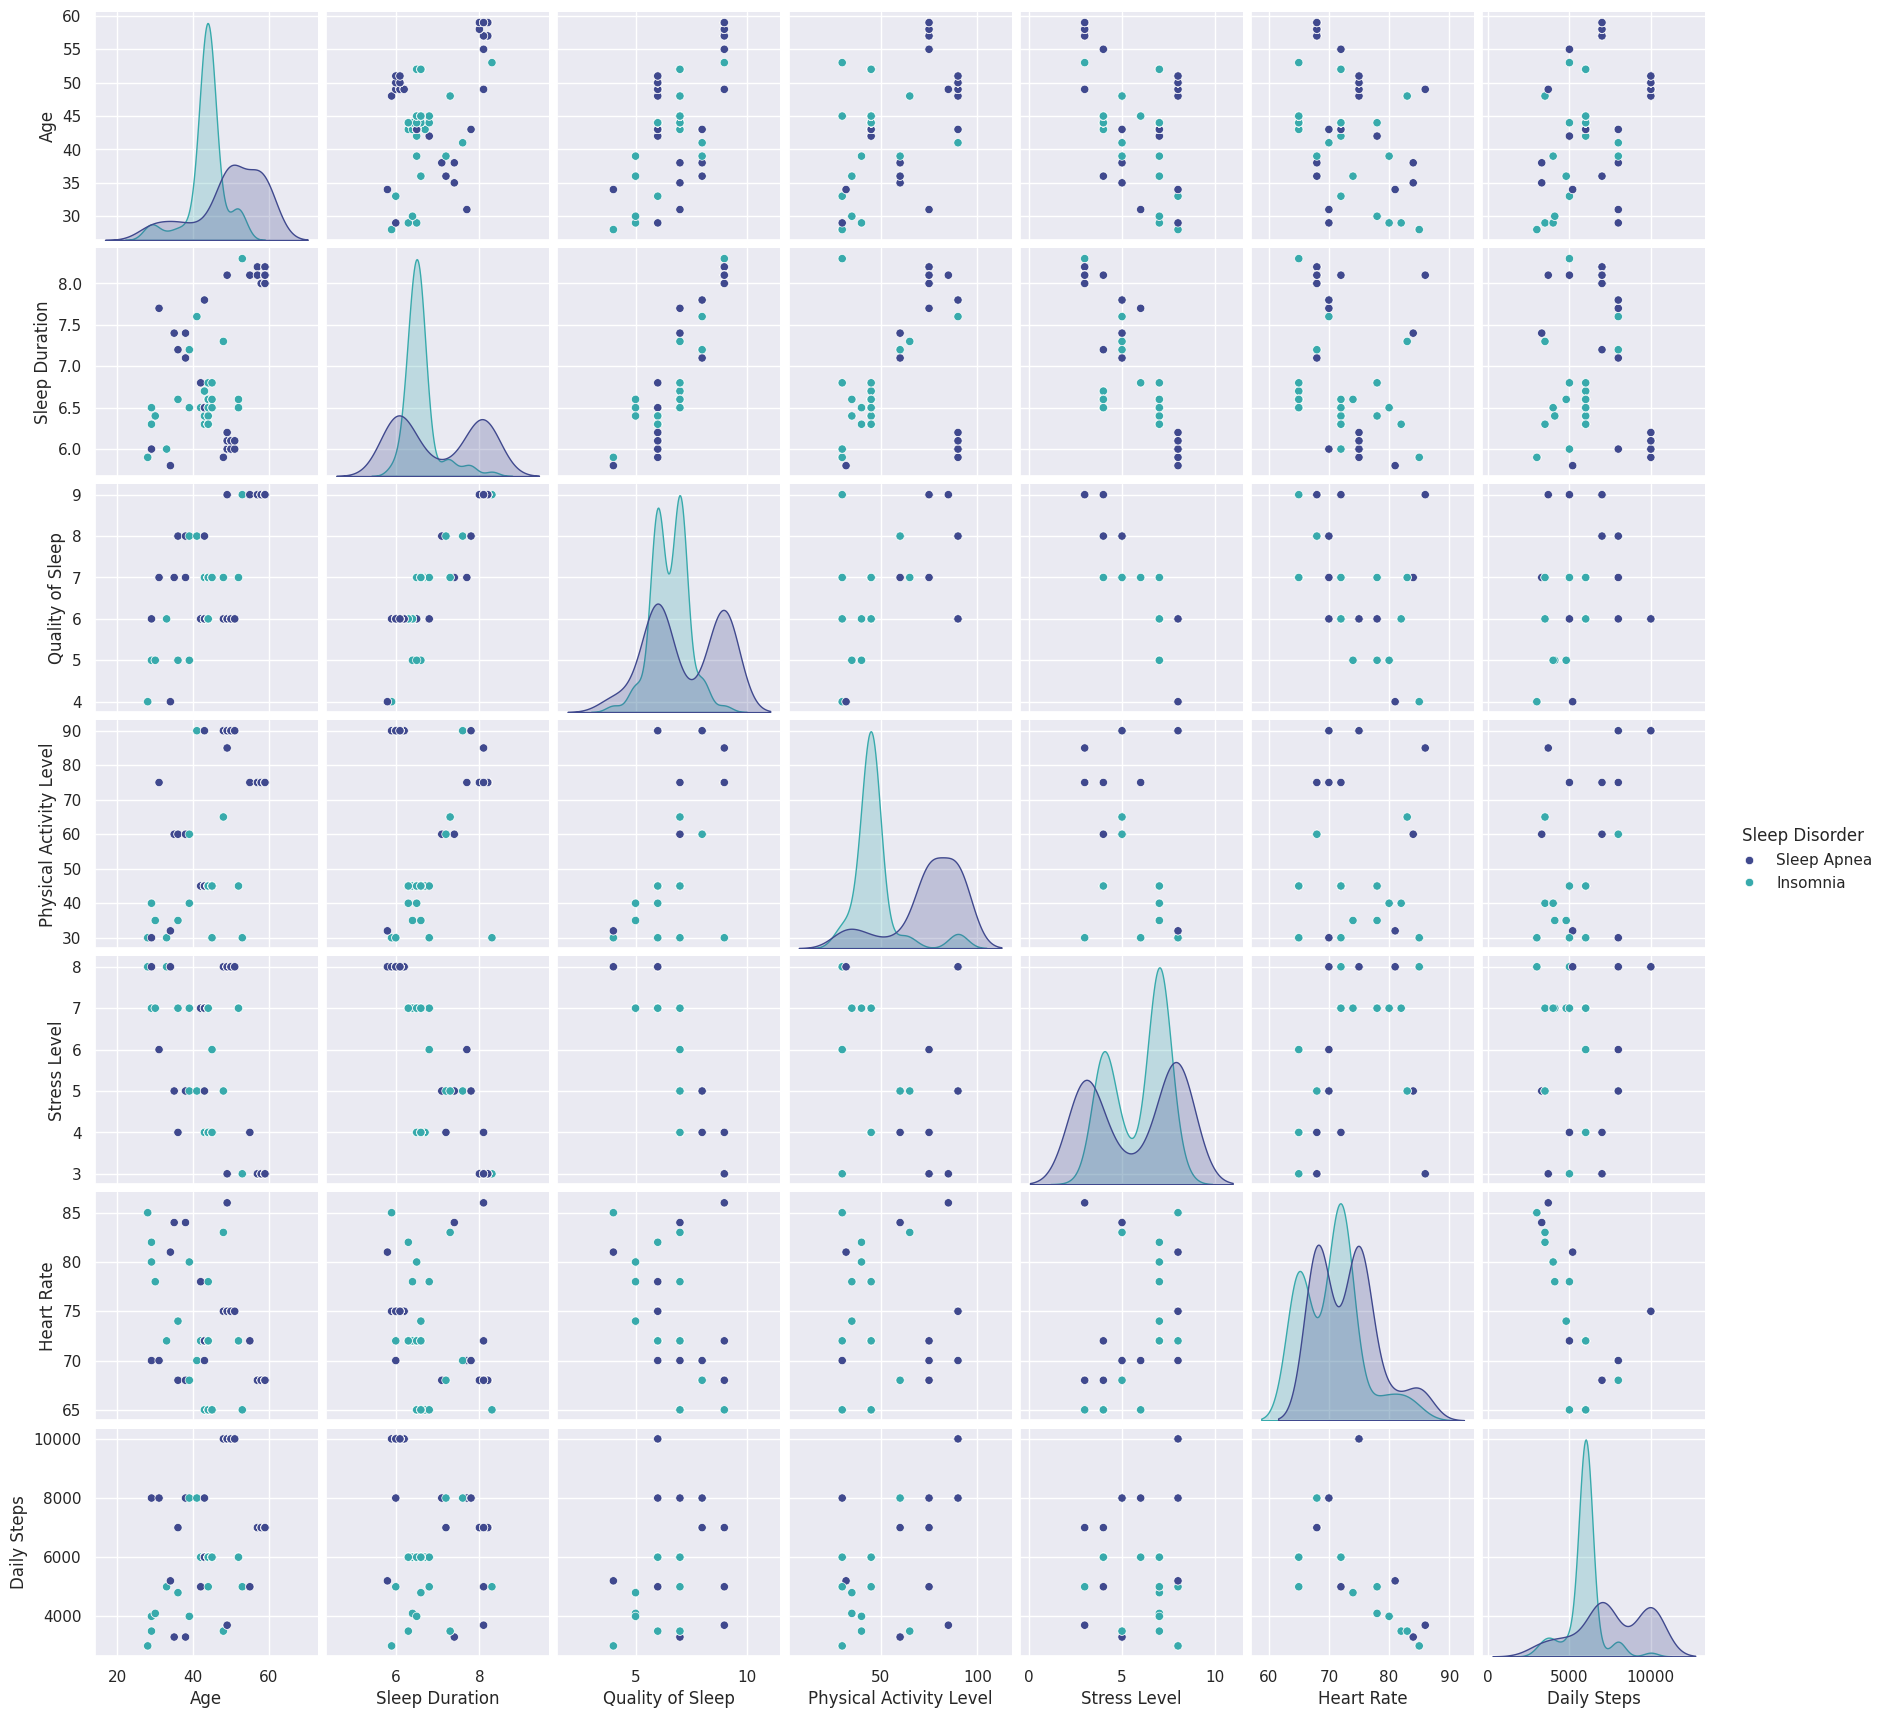

In [19]:
#pair plot

sns.pairplot(data = df, hue='Sleep Disorder', palette='mako')

In [20]:
#dividing the blood pressure column
df[['Upper BP', 'Lower BP']]=df['Blood Pressure'].str.split('/',expand=True).astype(int)
df.drop(columns='Blood Pressure',inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper BP,Lower BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


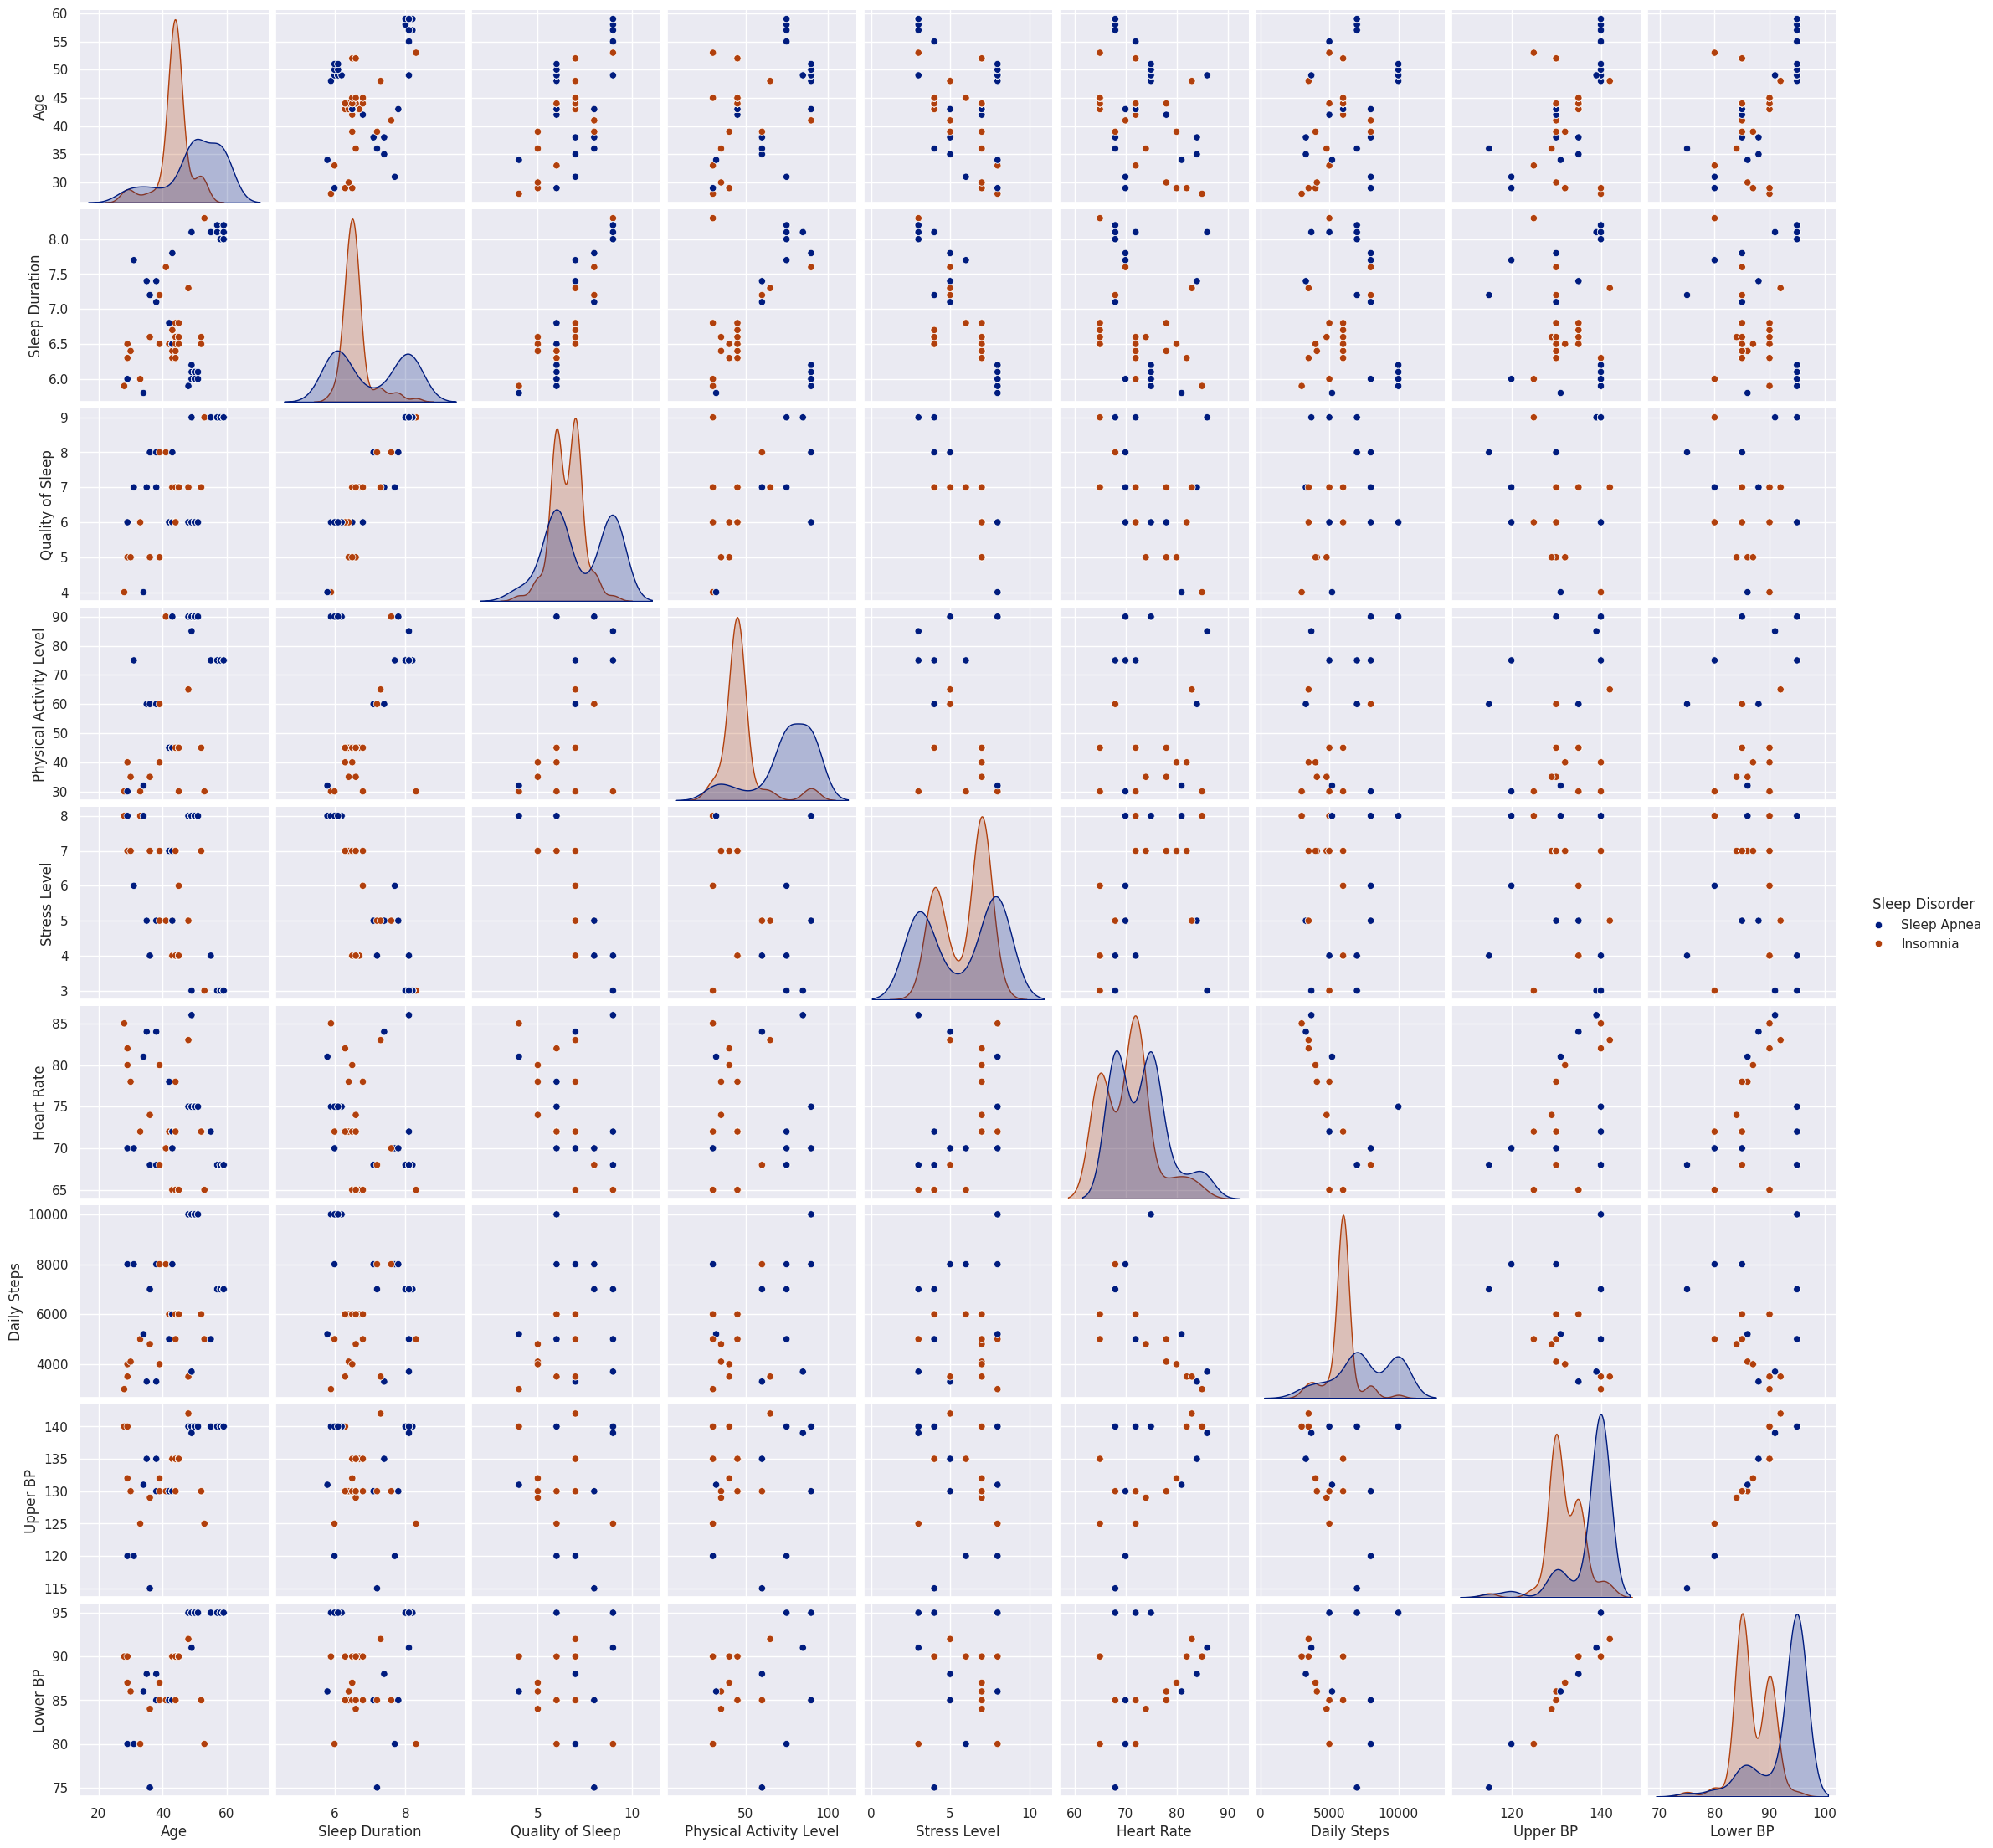

In [21]:
sns.pairplot(data = df, hue='Sleep Disorder', palette='dark')

##Histogram & pie charts


In [22]:
fig = px.histogram(df, x = 'Sleep Disorder',text_auto=True)
fig.update_layout(
    title = 'Distribution of people based Sleep Disorder',
    xaxis_title = 'Sleep Disorder',
    yaxis_title = 'Count',
    title_font = {'size':30},
    showlegend = True
)
fig.show()

In [23]:
#based on gender

df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male      41
                Female    36
Sleep Apnea     Female    67
                Male      11
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

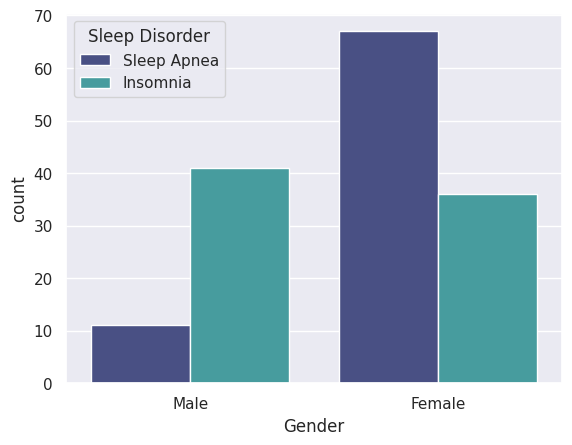

In [24]:
sns.countplot(data=df,x='Gender',hue='Sleep Disorder',palette='mako')

##Observation
1. Sleep Apnea is more in Females than males
2. Insomania is more in males than females

<Axes: ylabel='count'>

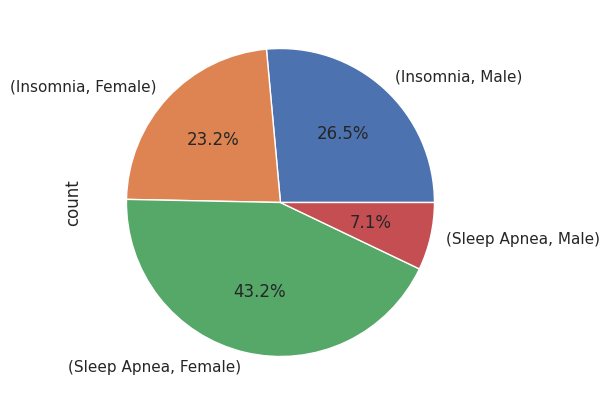

In [25]:
df.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,5))

In [26]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Upper BP', 'Lower BP'],
      dtype='object')

In [27]:
cat_cols=df.select_dtypes(include='object').columns

In [28]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Upper BP', 'Lower BP'],
      dtype='object')

In [29]:
#plot object variables

car_val = cat_cols[:3]
car_val

Index(['Gender', 'Occupation', 'BMI Category'], dtype='object')

/tmp/ipython-input-30-1980564855.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-30-1980564855.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-30-1980564855.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



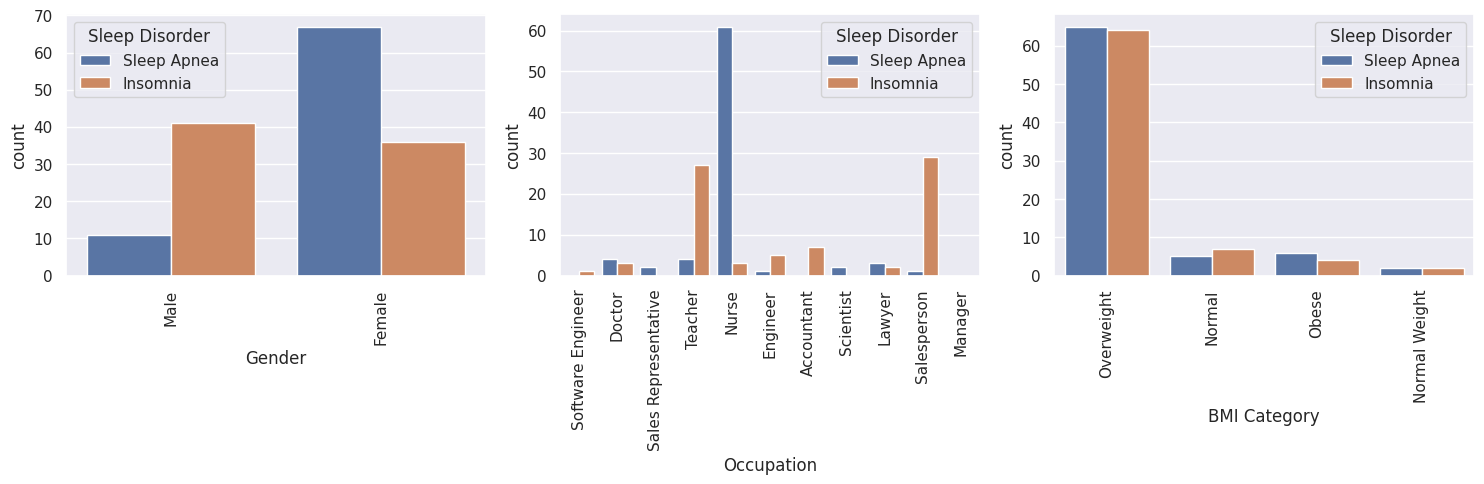

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = axs.flatten()

#bar plot
for i, var in enumerate(car_val):
  sns.countplot(x=var, hue='Sleep Disorder',data = df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

##Observation
1. Nurses are suffering from Sleep Apnea
2. Salespersons are suffering from Insomnia
3. Overweight people have higher chances of sleep disorder

<Axes: xlabel='Occupation', ylabel='Count'>

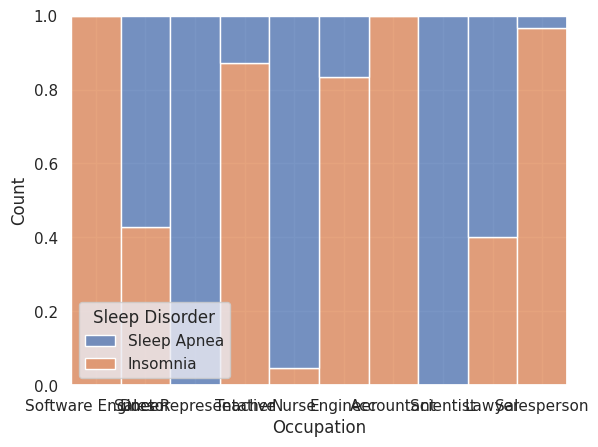

In [31]:
sns.histplot(x = df['Occupation'], hue = 'Sleep Disorder', data = df, multiple = 'fill',
             kde = False, element = 'bars',fill = True)

/tmp/ipython-input-32-2768527689.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-32-2768527689.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-32-2768527689.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



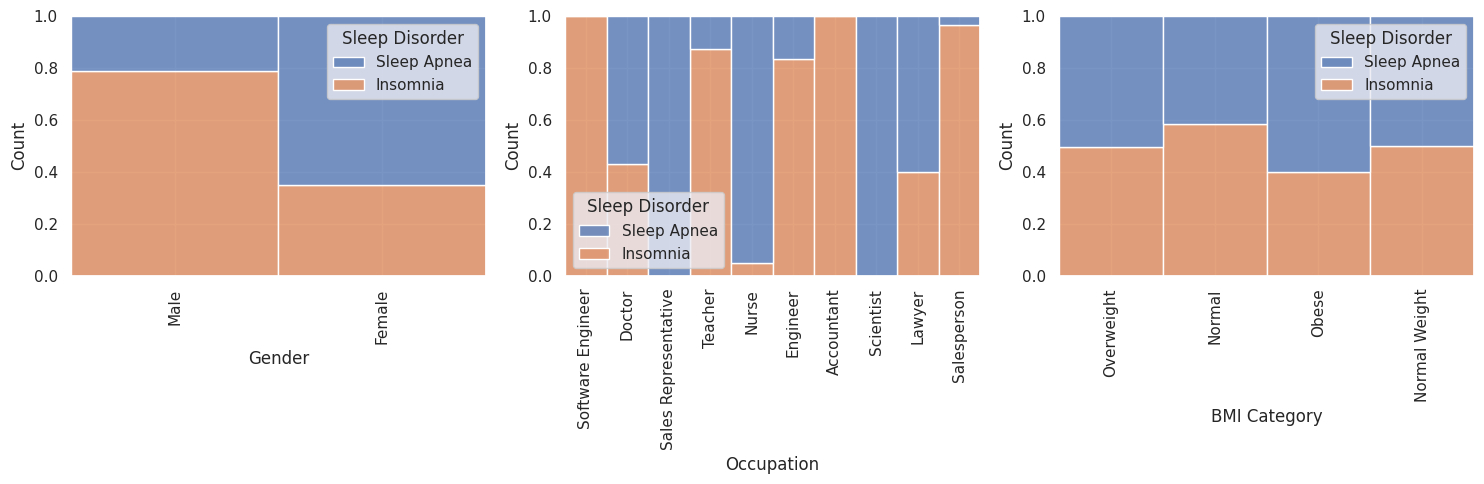

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = axs.flatten()

#bar plot
for i, var in enumerate(car_val):
  sns.histplot(x = var, hue = 'Sleep Disorder', data = df,ax = axs[i], multiple = 'fill',
             kde = False, element = 'bars',fill = True)
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
  axs[i].set_xlabel(var)

fig.tight_layout()

In [33]:
num_col


Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Upper BP', 'Lower BP'],
      dtype='object')

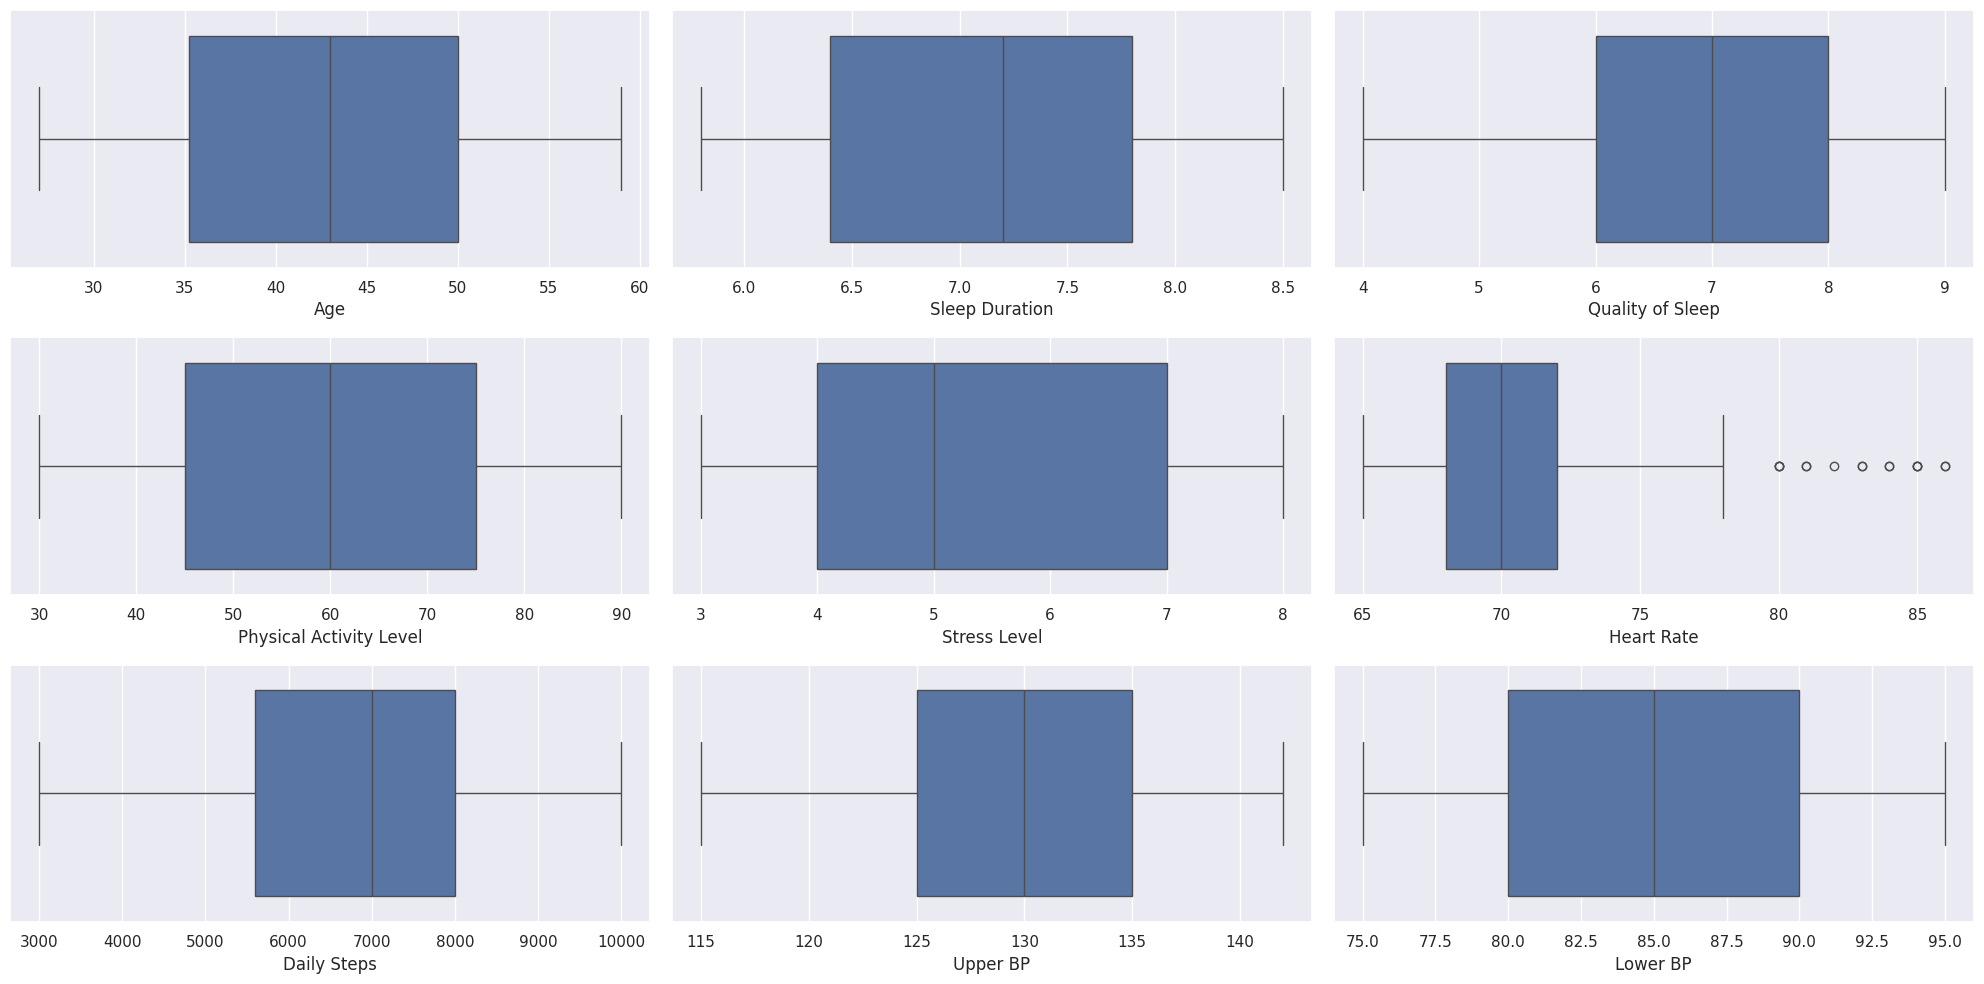

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_col):
  sns.boxplot(x = var, data = df, ax = axs[i])


fig.tight_layout()
fig.show()

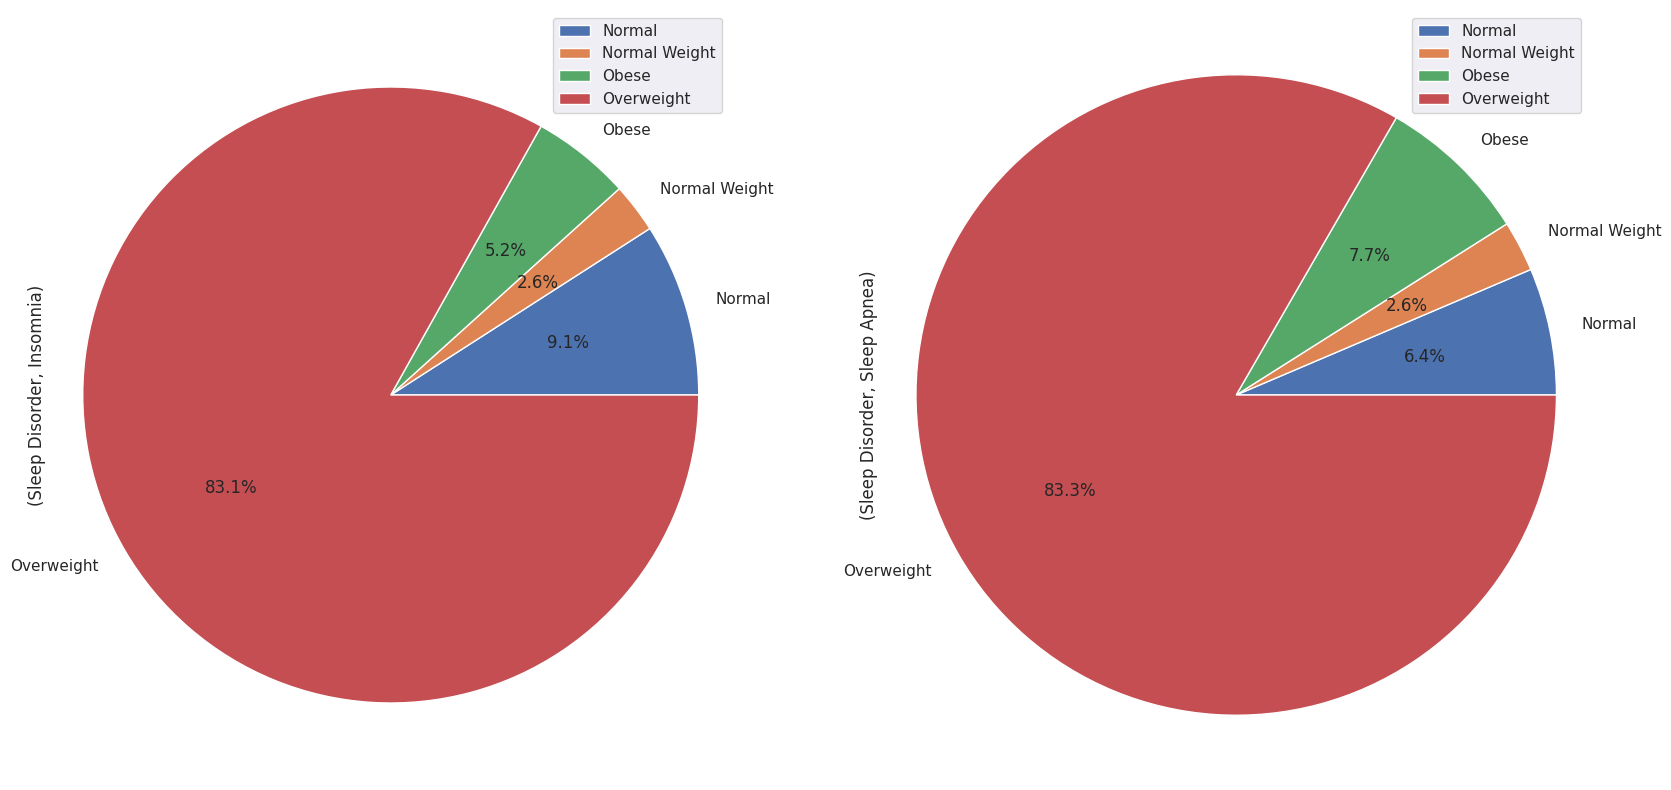

In [35]:
df.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder': 'count'}).plot.pie(autopct='%1.1f%%',
                                                                                                           subplots=True, figsize=(20,10))
plt.axis('equal')
plt.show()

##Data Preprocessing

In [36]:
#missing value
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


In [37]:
df = df.dropna(subset=['Sleep Disorder'])

In [38]:
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


##for categorical columns

In [39]:
for col in cat_cols:
  print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Sales Representative' 'Software Engineer' 'Teacher' 'Nurse' 'Doctor'
 'Scientist' 'Lawyer' 'Accountant' 'Engineer' 'Salesperson']
BMI Category: ['Obese' 'Normal Weight' 'Normal' 'Overweight']
Sleep Disorder: ['Sleep Apnea' 'Insomnia']


##Label Encoding for Categorical Columns

In [40]:
df = df.dropna(subset=['Sleep Disorder']).copy()  # prevents future warnings

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {df[col].unique()}")


Gender: [1 0]
Occupation: [5 8 9 4 1 7 3 0 2 6]
BMI Category: [2 1 0 3]
Sleep Disorder: [1 0]


##Correlation

In [41]:
corr = df.corr()

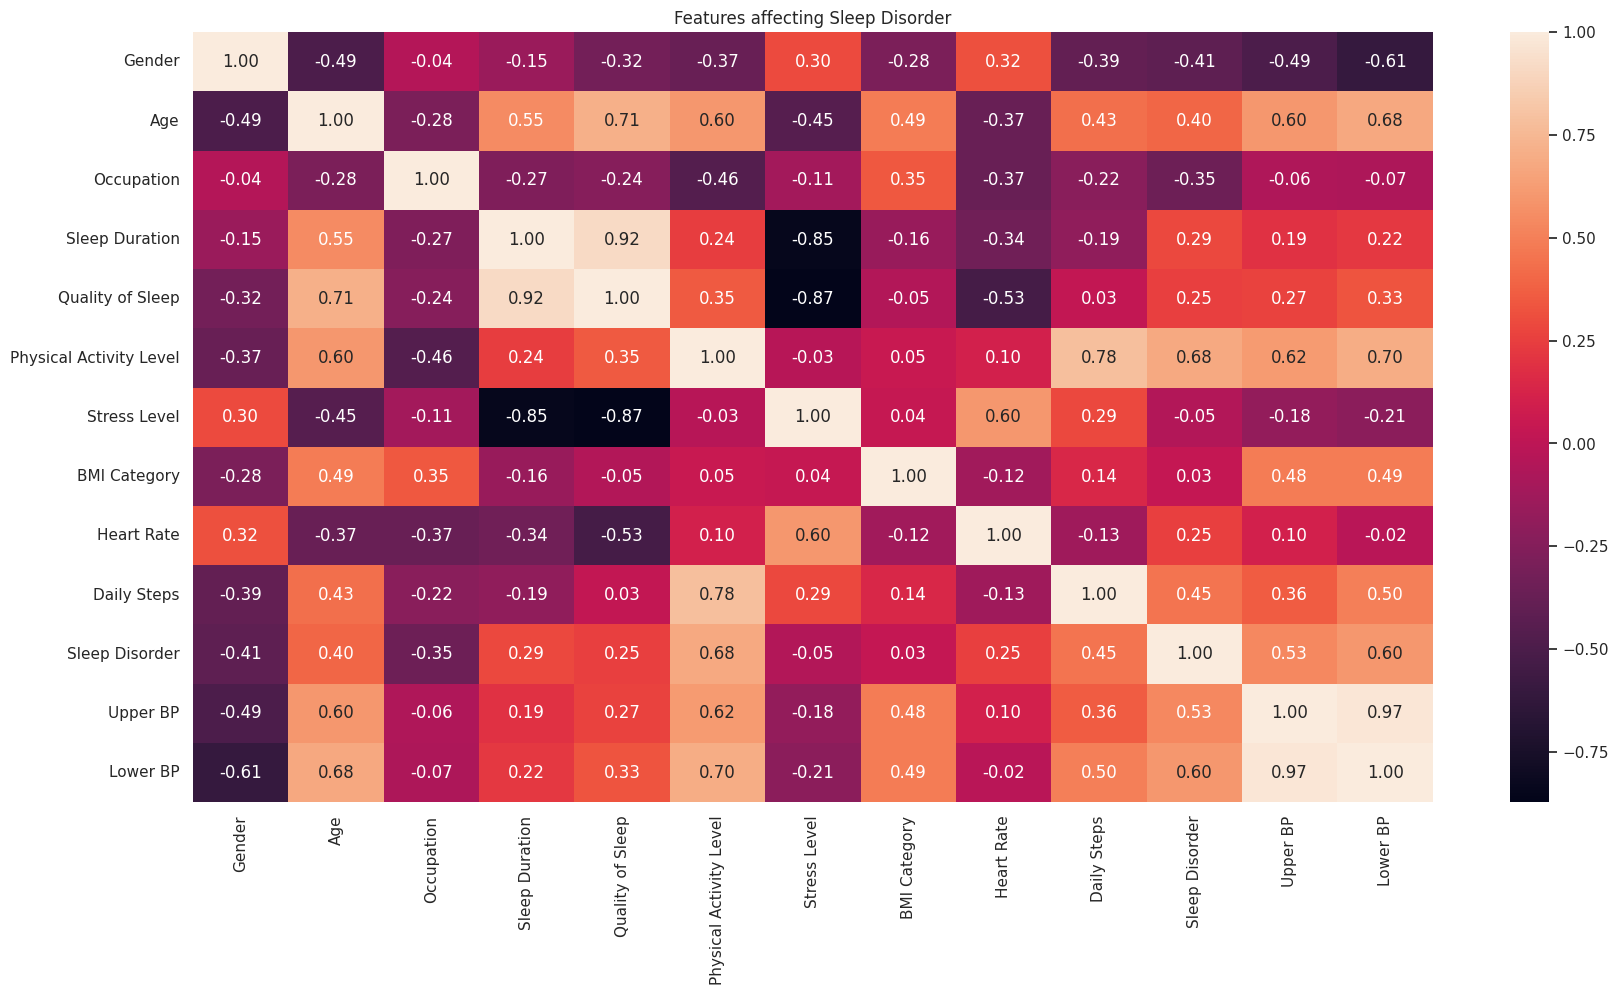

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(corr ,fmt='.2f',annot=True)

plt.title('Features affecting Sleep Disorder')
plt.show()

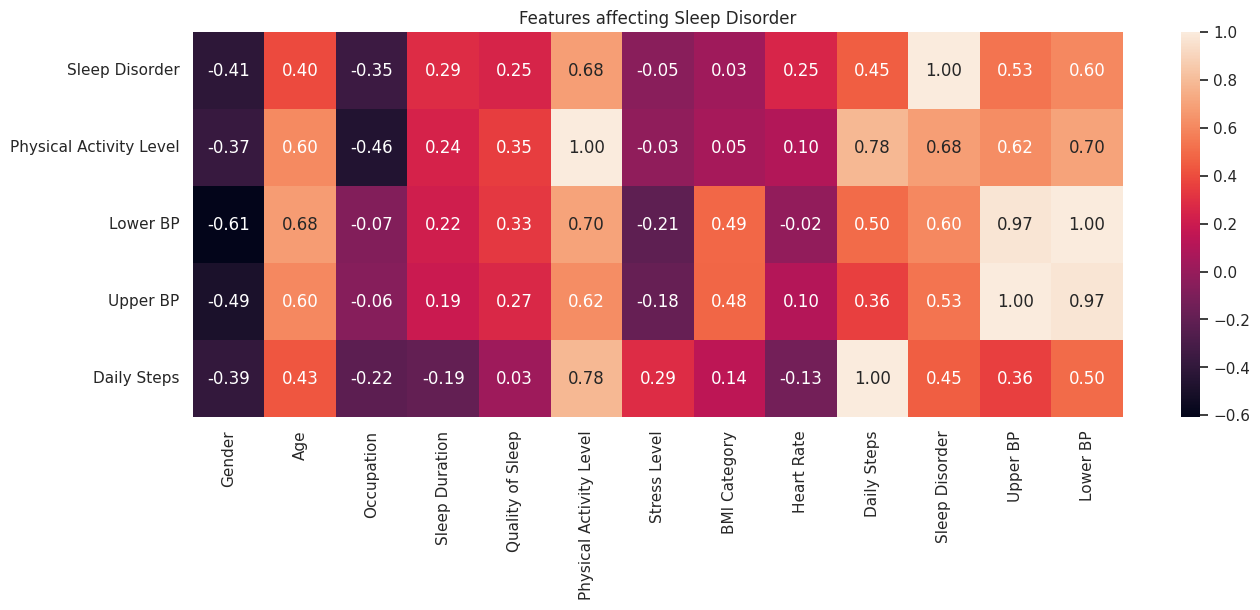

In [43]:
max_corr = corr.nlargest(5,'Sleep Disorder')
plt.figure(figsize=(15,5))
sns.heatmap(max_corr ,fmt='.2f',annot=True)

plt.title('Features affecting Sleep Disorder')
plt.show()

##Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='Sleep Disorder', axis =1)
y=df['Sleep Disorder']

#split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {X_test.shape}')

Shape of X_train: (108, 12)
Shape of y_train: (108,)
Shape of X_test: (47, 12)
Shape of y_test: (47, 12)


##Model Training


##1.Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [47]:
lr.score(X_train_scaled, y_train)

0.9166666666666666

In [48]:
lr.score(X_test_scaled, y_test)


0.8297872340425532

In [49]:
lr_pred = lr.predict(X_test_scaled)

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

accuracy_score(y_test, lr_pred)

0.8297872340425532

In [51]:
def model_accuracy(model, model_name):
  """ To print the accuracy score"""
  y_pred = model.predict(X_test_scaled)
  print(f"-------{model_name}--------")
  print(f'Accuracy Score:{round (accuracy_score(y_test, y_pred)*100,2)}%')
  print(f"F1 Score:{round (f1_score(y_test, y_pred, average = 'micro'),2)}")
  print(f"Precision Score:{round (precision_score(y_test, y_pred,average = 'micro'),2)}")
  print(f"Recall Score:{round (recall_score(y_test, y_pred,average = 'micro'),2)}")
  print(f"Jaccard Score:{round (jaccard_score(y_test, y_pred,average = 'micro'),2)}")

In [52]:
model_accuracy(lr, 'Logistic Regression')

-------Logistic Regression--------
Accuracy Score:82.98%
F1 Score:0.83
Precision Score:0.83
Recall Score:0.83
Jaccard Score:0.71


##2. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
model_accuracy(dt, 'Decision Tree before Grid Search')


-------Decision Tree before Grid Search--------
Accuracy Score:91.49%
F1 Score:0.91
Precision Score:0.91
Recall Score:0.91
Jaccard Score:0.84


In [54]:
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}


In [55]:
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

In [56]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [57]:
dt = DecisionTreeClassifier(
    random_state=0,
    max_depth=8,
    min_samples_leaf=1,
    min_samples_split=2
)

dt.fit(X_train_scaled, y_train)
y_pred_tree = dt.predict(X_test_scaled)
model_accuracy(dt, 'Decision Tree after Grid Search')


-------Decision Tree after Grid Search--------
Accuracy Score:91.49%
F1 Score:0.91
Precision Score:0.91
Recall Score:0.91
Jaccard Score:0.84


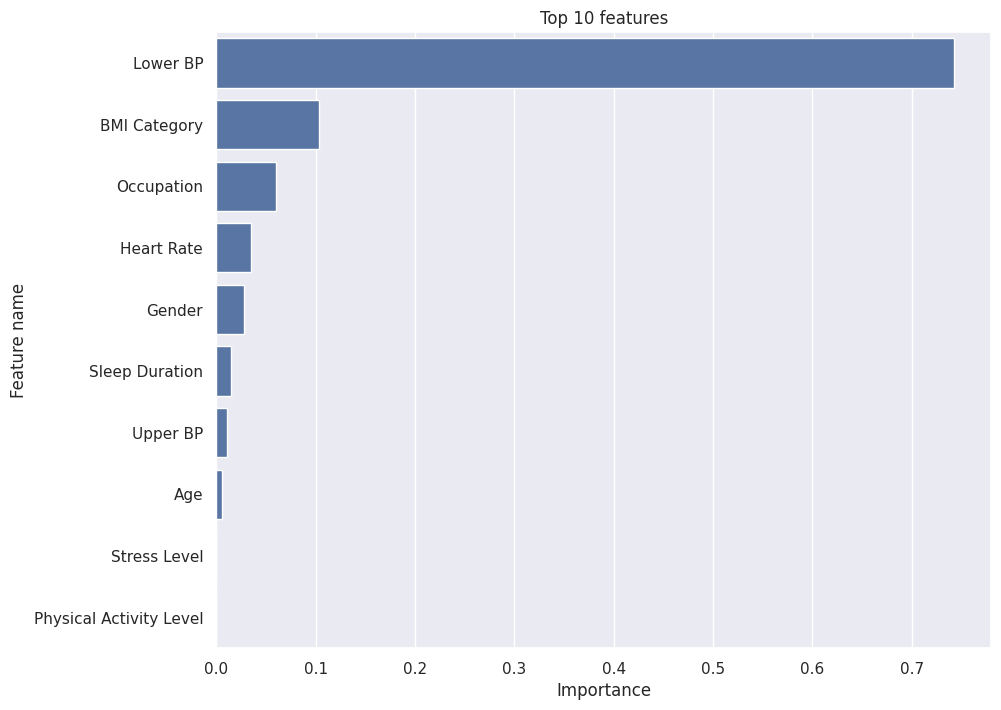

In [58]:
imp_df = pd.DataFrame({
    'Feature name': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=imp_df,x='Importance', y='Feature name')
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('Top 10 features')
plt.show()

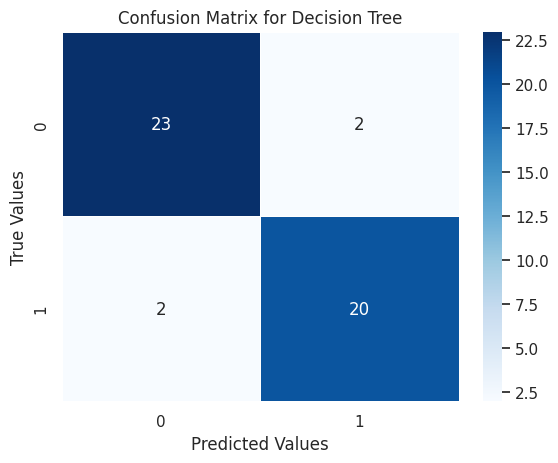

In [67]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(data=cm,linewidths=.5, annot=True, cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

##3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
model_accuracy(rf, 'Random Forest before Grid Search')

-------Random Forest before Grid Search--------
Accuracy Score:87.23%
F1 Score:0.87
Precision Score:0.87
Recall Score:0.87
Jaccard Score:0.77


In [61]:
#gridsearch CV

param_grid={
    'n_estimators':[100,200],
    'max_depth':[None, 5, 10],
    'max_features':['sqrt','log2',None],
    'random_state':[0,42]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

In [62]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 0}

In [63]:
rf = RandomForestClassifier(
    random_state=0,
    max_depth=10,
    max_features='sqrt',
    n_estimators=100

)
rf.fit(X_train_scaled, y_train)
model_accuracy(rf, 'Random Forest after Grid Search')

-------Random Forest after Grid Search--------
Accuracy Score:87.23%
F1 Score:0.87
Precision Score:0.87
Recall Score:0.87
Jaccard Score:0.77


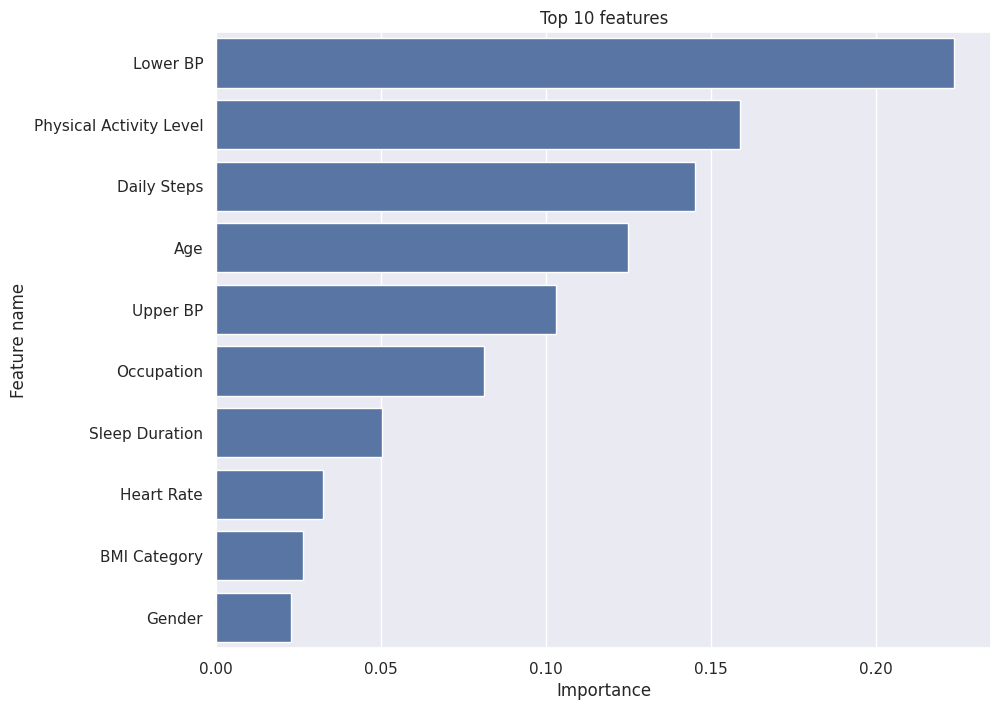

In [64]:
imp_df = pd.DataFrame({
    'Feature name': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=imp_df,x='Importance', y='Feature name')
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('Top 10 features')
plt.show()

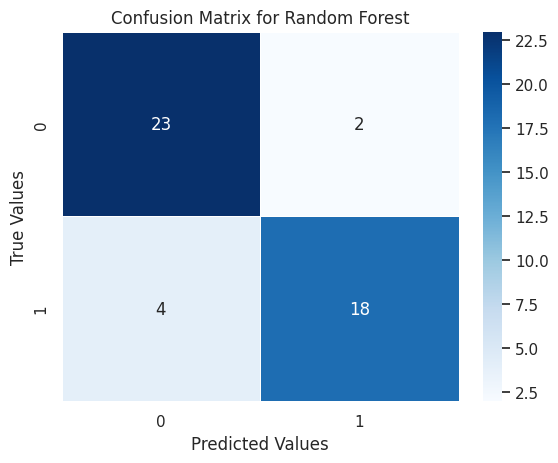

In [68]:
#confusion matrix

from sklearn.metrics import confusion_matrix

y_pred_rforest = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rforest)
sns.heatmap(data=cm,linewidths=.5, annot=True, cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

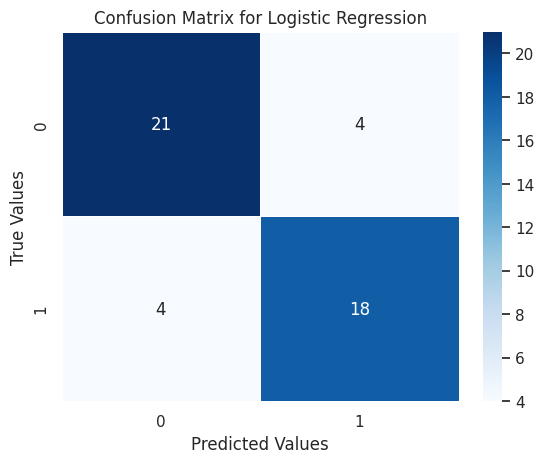

In [69]:
#confusion matrix

from sklearn.metrics import confusion_matrix

y_pred_logR = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_logR)
sns.heatmap(data=cm,linewidths=.5, annot=True, cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [70]:
model_accuracy(dt, 'Decision Tree')
model_accuracy(rf, 'Random Forest')
model_accuracy(lr, 'Logistic Regression')

-------Decision Tree--------
Accuracy Score:91.49%
F1 Score:0.91
Precision Score:0.91
Recall Score:0.91
Jaccard Score:0.84
-------Random Forest--------
Accuracy Score:87.23%
F1 Score:0.87
Precision Score:0.87
Recall Score:0.87
Jaccard Score:0.77
-------Logistic Regression--------
Accuracy Score:82.98%
F1 Score:0.83
Precision Score:0.83
Recall Score:0.83
Jaccard Score:0.71


##Save the Model

In [71]:
import joblib
joblib.dump(dt, 'SleepHealth_model.pkl')

['SleepHealth_model.pkl']